In [1]:
import pymssql
import pandas as pd

In [2]:
database = "group4"
mortalityTable = "dbo.mortality"
underweightTable = "dbo.underweight"
waterTable = "dbo.water"
malariaTable = "dbo.malaria"
tbTable = "dbo.tb"
user = "group4user"
password  = "everythingIsAwesome!"
server = "database2108.database.windows.net"

In [3]:
conn = pymssql.connect(server, user, password, database)

dfMortal = pd.read_sql(f"SELECT * FROM {mortalityTable}", conn)
dfUnder = pd.read_sql(f"SELECT * FROM {underweightTable}", conn)
dfWater = pd.read_sql(f"SELECT * FROM {waterTable}", conn)
dfMalaria = pd.read_sql(f"SELECT * FROM {malariaTable}", conn)
dfTb = pd.read_sql(f"SELECT * FROM {tbTable}", conn)

display(dfMortal)
display(dfUnder)
display(dfWater)
display(dfMalaria)
display(dfTb)

,Country,Year,PercentMortality
0,AFG,2000,31.6
1,AFG,2001,30.7
2,AFG,2002,29.2
3,AFG,2003,28.6
4,AFG,2004,28.2
...,...,...,...
3106,ZWE,2012,40.7
3107,ZWE,2013,38.3
3108,ZWE,2014,35.8
3109,ZWE,2015,34.6


,Country,PercentUnderweightAdults,Year
0,AFG,29.200001,1975
1,AFG,28.900000,1976
2,AFG,28.700001,1977
3,AFG,28.400000,1978
4,AFG,28.100000,1979
...,...,...,...
8143,ZWE,8.300000,2012
8144,ZWE,8.200000,2013
8145,ZWE,8.100000,2014
8146,ZWE,8.000000,2015


,Country,Year,PercentWater
0,AFG,2000,28.171419
1,AFG,2001,28.199369
2,AFG,2002,30.236380
3,AFG,2003,32.273720
4,AFG,2004,34.328560
...,...,...,...
3327,ZWE,2012,66.491180
3328,ZWE,2013,65.966469
3329,ZWE,2014,65.454109
3330,ZWE,2015,64.954933


,Country,Year,PercentMalaria
0,ABW,2000,0.0
1,ABW,2001,0.0
2,ABW,2002,0.0
3,ABW,2003,0.0
4,ABW,2004,0.0
...,...,...,...
4211,ZWE,2012,5.7
4212,ZWE,2013,8.1
4213,ZWE,2014,10.1
4214,ZWE,2015,9.7


,Country,Year,PercentTb
0,AFG,2000,0.190
1,AFG,2001,0.189
2,AFG,2002,0.189
3,AFG,2003,0.189
4,AFG,2004,0.189
...,...,...,...
3459,ZWE,2016,0.233
3460,ZWE,2017,0.221
3461,ZWE,2018,0.210
3462,ZWE,2019,0.199


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

joined = dfWater.merge(dfUnder, on = ["Country", "Year"]) \
                .merge(dfMortal, on = ["Country", "Year"]) \
                .merge(dfMalaria, on = ["Country", "Year"]) \
                .merge(dfTb, on = ["Country", "Year"])

display(joined)

,Country,Year,PercentWater,PercentUnderweightAdults,PercentMortality,PercentMalaria,PercentTb
0,AFG,2000,28.171419,22.000000,31.6,8.2,0.190
1,AFG,2001,28.199369,21.600000,30.7,7.9,0.189
2,AFG,2002,30.236380,21.299999,29.2,7.9,0.189
3,AFG,2003,32.273720,20.900000,28.6,6.8,0.189
4,AFG,2004,34.328560,20.600000,28.2,3.7,0.189
...,...,...,...,...,...,...,...
3083,ZWE,2012,66.491180,8.300000,40.7,5.7,0.355
3084,ZWE,2013,65.966469,8.200000,38.3,8.1,0.304
3085,ZWE,2014,65.454109,8.100000,35.8,10.1,0.278
3086,ZWE,2015,64.954933,8.000000,34.6,9.7,0.242


In [6]:
from sklearn.model_selection import train_test_split
X = joined.drop(["Country", "PercentMortality"], axis = 1)
y = joined["PercentMortality"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
estimators = np.linspace(5, 100, 20, dtype = int)
parameters = {'random_state': [0], 'n_estimators': estimators,
              'criterion': ["squared_error", "absolute_error", "poisson"]}
clf = GridSearchCV(RandomForestRegressor(), parameters, verbose = 4)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=squared_error, n_estimators=5, random_state=0;, score=0.920 total time=   0.0s
[CV 2/5] END criterion=squared_error, n_estimators=5, random_state=0;, score=0.894 total time=   0.0s
[CV 3/5] END criterion=squared_error, n_estimators=5, random_state=0;, score=0.913 total time=   0.0s
[CV 4/5] END criterion=squared_error, n_estimators=5, random_state=0;, score=0.899 total time=   0.0s
[CV 5/5] END criterion=squared_error, n_estimators=5, random_state=0;, score=0.926 total time=   0.0s
[CV 1/5] END criterion=squared_error, n_estimators=10, random_state=0;, score=0.934 total time=   0.0s
[CV 2/5] END criterion=squared_error, n_estimators=10, random_state=0;, score=0.905 total time=   0.0s
[CV 3/5] END criterion=squared_error, n_estimators=10, random_state=0;, score=0.932 total time=   0.0s
[CV 4/5] END criterion=squared_error, n_estimators=10, random_state=0;, score=0.920 total time=   0.0s
[CV 5/5] END cri

[CV 5/5] END criterion=squared_error, n_estimators=80, random_state=0;, score=0.938 total time=   0.5s
[CV 1/5] END criterion=squared_error, n_estimators=85, random_state=0;, score=0.942 total time=   0.5s
[CV 2/5] END criterion=squared_error, n_estimators=85, random_state=0;, score=0.909 total time=   0.5s
[CV 3/5] END criterion=squared_error, n_estimators=85, random_state=0;, score=0.944 total time=   0.5s
[CV 4/5] END criterion=squared_error, n_estimators=85, random_state=0;, score=0.924 total time=   0.6s
[CV 5/5] END criterion=squared_error, n_estimators=85, random_state=0;, score=0.938 total time=   0.6s
[CV 1/5] END criterion=squared_error, n_estimators=90, random_state=0;, score=0.942 total time=   0.6s
[CV 2/5] END criterion=squared_error, n_estimators=90, random_state=0;, score=0.910 total time=   0.6s
[CV 3/5] END criterion=squared_error, n_estimators=90, random_state=0;, score=0.944 total time=   0.7s
[CV 4/5] END criterion=squared_error, n_estimators=90, random_state=0;, s

[CV 4/5] END criterion=absolute_error, n_estimators=60, random_state=0;, score=0.942 total time=   2.9s
[CV 5/5] END criterion=absolute_error, n_estimators=60, random_state=0;, score=0.937 total time=   2.9s
[CV 1/5] END criterion=absolute_error, n_estimators=65, random_state=0;, score=0.945 total time=   3.1s
[CV 2/5] END criterion=absolute_error, n_estimators=65, random_state=0;, score=0.914 total time=   3.1s
[CV 3/5] END criterion=absolute_error, n_estimators=65, random_state=0;, score=0.944 total time=   3.1s
[CV 4/5] END criterion=absolute_error, n_estimators=65, random_state=0;, score=0.942 total time=   3.1s
[CV 5/5] END criterion=absolute_error, n_estimators=65, random_state=0;, score=0.938 total time=   3.4s
[CV 1/5] END criterion=absolute_error, n_estimators=70, random_state=0;, score=0.946 total time=   3.6s
[CV 2/5] END criterion=absolute_error, n_estimators=70, random_state=0;, score=0.915 total time=   3.3s
[CV 3/5] END criterion=absolute_error, n_estimators=70, random_s

[CV 1/5] END criterion=poisson, n_estimators=45, random_state=0;, score=0.873 total time=   0.9s
[CV 2/5] END criterion=poisson, n_estimators=45, random_state=0;, score=0.834 total time=   0.9s
[CV 3/5] END criterion=poisson, n_estimators=45, random_state=0;, score=0.884 total time=   0.9s
[CV 4/5] END criterion=poisson, n_estimators=45, random_state=0;, score=0.862 total time=   0.9s
[CV 5/5] END criterion=poisson, n_estimators=45, random_state=0;, score=0.856 total time=   0.8s
[CV 1/5] END criterion=poisson, n_estimators=50, random_state=0;, score=0.874 total time=   1.0s
[CV 2/5] END criterion=poisson, n_estimators=50, random_state=0;, score=0.834 total time=   1.0s
[CV 3/5] END criterion=poisson, n_estimators=50, random_state=0;, score=0.884 total time=   1.0s
[CV 4/5] END criterion=poisson, n_estimators=50, random_state=0;, score=0.864 total time=   1.0s
[CV 5/5] END criterion=poisson, n_estimators=50, random_state=0;, score=0.855 total time=   0.9s
[CV 1/5] END criterion=poisson

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
                         'random_state': [0]},
             verbose=4)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
0.9542749216903018


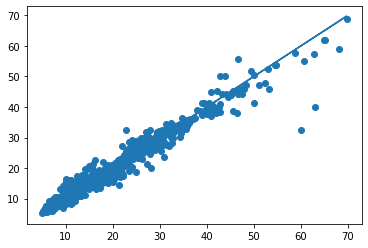

In [15]:
import matplotlib.pyplot as plt
bclf = clf.best_estimator_
print(bclf.get_params())
bclf.fit(X_train, y_train)
print(bclf.score(X_test, y_test))

prediction = bclf.predict(X_test)
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test)

In [ ]:
import pickle
pickle.dump(bclf, open("./Model/randomforest.pkl", "wb"))